# Differentiation

In this tutorial, we will look at a number of ways to calculate the derivative of a function, and also look at how we might use these derivatives in an optimisation process using gradient descent.

## Differentiation by hand

Given a sufficiently simple function, it can be easy to compute its derivative by hand. For example in the code below, we compute the derivative of `x**3`:

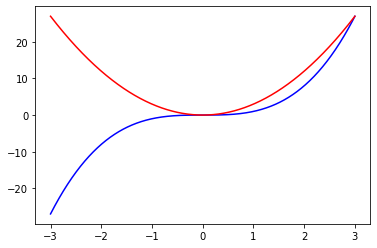

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, num=1000)
x_cubed = x**3

# The derivative of x**3 is 3*x**2
x_deriv = 3 * (x ** 2)

plt.plot(x, x_cubed, "b")
plt.plot(x, x_deriv, "r")

If you have a more complex function, but the function is still known, it may also be possible to get the computer to compute the derivative for you using a symbolic differentiation package such as [sympy](https://www.sympy.org/en/index.html).

## Finite differences

Sometimes you may only have access to the output of a function, and not have a defined mathematical formula describing it. In this case differentiating as shown above is not possible. However it is still possible to estimate the derivative using [finite difference](https://en.wikipedia.org/wiki/Finite_difference) methods.

The most straightforward way to estimate the gradient of a function f(x) is to pick a small offset h, and then compute the forward difference f(x+h) - f(x) / h

We can do this manually using a for loop:

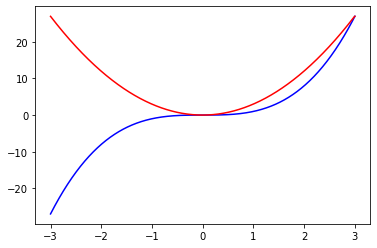

In [24]:
n_samples = 1000

x = np.linspace(-3, 3, num=n_samples)
x_cubed = x**3

h = (3 - (-3)) / n_samples # The step size

def finite_differences(values, stepsize):
    deriv = np.zeros_like(values)

    for i in range(len(x)-1):
        deriv[i] = (values[i+1] - values[i]) / stepsize

    # For the last element we have to use a backward difference:
    deriv[-1] = (values[-1] - values[-2]) / stepsize
    return deriv

x_deriv_est = finite_differences(x_cubed, h)

plt.plot(x, x_cubed, "b")
plt.plot(x, x_deriv_est, "r")

In this case this approximates the true gradient reasonably well:

False


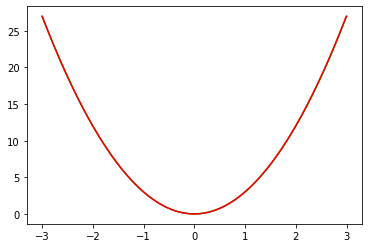

In [15]:
plt.plot(x, x_deriv, "g")
plt.plot(x, x_deriv_est, "r")

# But it isn't close enough for np.allclose():
print(np.allclose(x_deriv, x_deriv_est))

Numpy has a built in function `numpy.gradient()` that computes gradients. This also uses a finite differences method, but a more sophisticated second order implementation (see the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) for details).

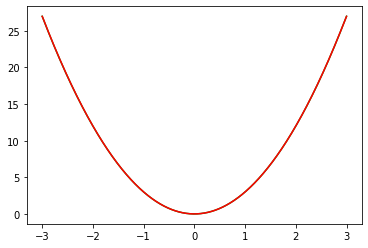

In [21]:
n_samples = 1000

x = np.linspace(-3, 3, num=n_samples)
x_cubed = x**3

h = (3 - (-3)) / n_samples # The step size

grad = np.gradient(x_cubed, h)

plt.plot(x, x_deriv, "g")
plt.plot(x, grad, "r")

It's important to remember that how well any finite differences methods will work depends heavily on the function and the step size h. If the function is too complex or the step size too large, the gradient may be very inaccurate.

## Gradient descent and optimisation

Now that we have explored some ways to calculate gradients, we will look at an application for them - gradient descent. This is a widely used technique to find the minimum of a function.

The general idea is to start from some point in the range of the function. We then follow an iterative process where at each step we move along the negative gradient of the function. Generally the step is multiplied by a constant called the learning rate:

x = x - learning_rate * dx

Eventually this should converge to the minimum of the function. However the learning rate and the initial point chosen to begin the process are both very important in obtaining good convergence.

Below is a simple 2D example, finding the minimum of x**2:

Final value: -0.0504791074251593


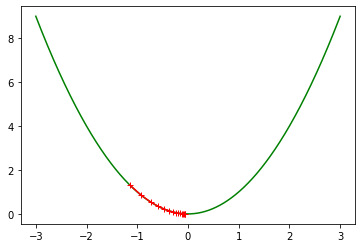

In [47]:
n_samples = 1000

x = np.linspace(-3, 3, num=n_samples)
x_squared = x**2

initial_x = (np.random.rand(1) * 6) - 3 # Select a random starting point in [-3, 3)
learning_rate = 0.1
n_steps = 15

step_vals = np.zeros([n_steps]) # Make an array to store the result of gradient descent at each step.
curr_x = initial_x
step_vals[0] = curr_x

for step in range(1, n_steps):
    curr_x = curr_x - learning_rate * (2 * curr_x) # Here we're using the gradient 2x.
    step_vals[step] = curr_x

step_vals_sq = step_vals**2

plt.plot(x, x_squared, "g")
plt.plot(step_vals, step_vals_sq, "r+-") # Plot all the steps in red, using +s

print("Final value:", step_vals[-1])

Try running the above example multiple times, and note that how close it is able to get to the real answer 0 depends on the starting location.

Also, try increasing the learning_rate value - note that it helps convergence up to a point, but above about 0.5 it can actually cause the approach not to converge.

Here is a 2D example, with a more complicated function. In this case the gradients are calculated using finite differences rather than analytically.

Final value: [ 0 -1]


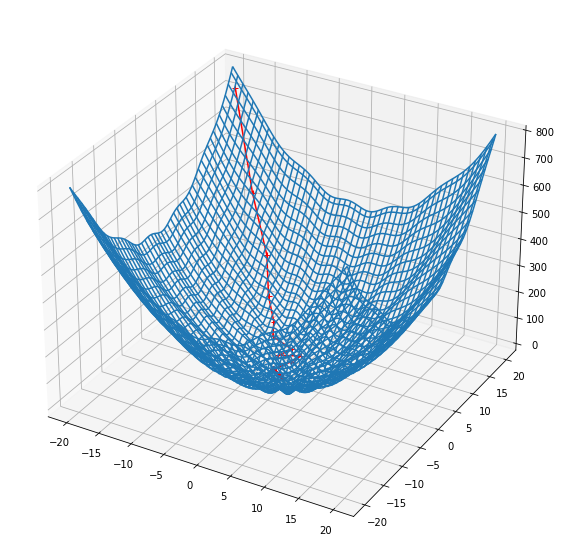

In [95]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

n_rows = 100

x = np.linspace(-20, 20, num=n_rows)
y = np.linspace(-20, 20, num=n_rows)
x, y = np.meshgrid(x, y)

# This makes the polar function r**2 + 10 * sin(20 * theta)
# This is a parabolic bowl with some oscillations from the sin function.
radius = np.sqrt(x*x + y*y)
angle = np.arctan2(y, x)
height = (radius**2) + 10*np.sin(angle*20)

stepsize = (20 - (-20)) / n_rows 

# Finding the gradients along each axis using finite differences.
x_grad_height = np.gradient(height, stepsize, axis=0)
y_grad_height = np.gradient(height, stepsize, axis=1)

# Parameters for the gradient descent - try changing these & see what happens!
initial_value = np.array([-19, 19])
learning_rate = 0.1
n_steps = 50

step_vals = np.zeros([n_steps, 2]) # Make an array to store the result of gradient descent at each step.
curr_val = initial_value
step_vals[0] = curr_val
step_heights = np.zeros([n_steps])

for step in range(1, n_steps):
    # Here we find the indices we need to look up in the gradient arrays to find the current gradient.
    x_idx = int(((curr_val[0] + 20) / 40) * n_rows)
    y_idx = int(((curr_val[1] + 20) / 40) * n_rows)

    # Now we use these indices to find the gradients in X and Y
    x_grad = x_grad_height[x_idx, y_idx]
    y_grad = y_grad_height[x_idx, y_idx]

    # Finally we can use these gradient values to take a step in the gradient descent.
    curr_val[0] -= learning_rate * x_grad
    curr_val[1] -= learning_rate * y_grad

    step_vals[step, :] = curr_val
    step_heights[step-1] = height[x_idx, y_idx]

# Print the final position ()
print("Final value:", curr_val)

ax.plot_wireframe(x, y, height)
ax.plot(step_vals[:,0], step_vals[:,1], step_heights, "r+-")

plt.show()

## Automatic Differentiation

